In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
from pyproj import CRS
import sys
import os
import pickle
import matplotlib.pyplot as plt
from pyproj import CRS
from shapely import wkt
from shapely.geometry import Polygon, MultiPolygon
from matplotlib_scalebar.scalebar import ScaleBar

from citymob import import_csv_w_wkt_to_gdf

crs0=3035

In [2]:
# germann postcodes gdf
fp="../shapefiles/plz-5stellig.shp/plz-5stellig.shp"
de_plz = gpd.read_file(fp)
de_plz.to_crs(crs0,inplace=True)

# complete german boundary, based on the plz
de_bound=gpd.GeoDataFrame(geometry=[de_plz.loc[:,'geometry'].unary_union],crs=crs0)

In [3]:
# french postcodes, used here to make the french boundary
FR=gpd.read_file('../../MSCA_data/France_Shapefiles/code-postal-code-insee-2015/code-postal-code-insee-2015.shp')
FR=FR.loc[~FR['nom_reg'].isin(['REUNION','GUADELOUPE','MARTINIQUE','GUYANE','MAYOTTE']),:]

FR.to_crs(crs0,inplace=True)
fr_bound=gpd.GeoDataFrame(geometry=[FR.loc[:,'geometry'].unary_union],crs=crs0)

In [4]:
# Spain boundary, from https://www.diva-gis.org/datadown
ES=gpd.read_file('../../MSCA_data/ESP_adm/ESP_adm1.shp')
ES.to_crs(crs0,inplace=True)
es_bound=gpd.GeoDataFrame(geometry=[ES.loc[ES['NAME_1']!='Islas Canarias','geometry'].unary_union],crs=crs0)

In [5]:
# austria boundary
AT=gpd.read_file('../../MSCA_data/Austria_shapefiles/STATISTIK_AUSTRIA_GEM_20130101.shp')
AT.to_crs(crs0,inplace=True)
at_bound=gpd.GeoDataFrame(geometry=[AT.loc[:,'geometry'].unary_union],crs=crs0)


In [6]:
# combine the FR and DE boundaries
bound_all=pd.concat([fr_bound,de_bound])
bound_all=pd.concat([bound_all,es_bound])
bound_all=pd.concat([bound_all,at_bound])

<AxesSubplot:>

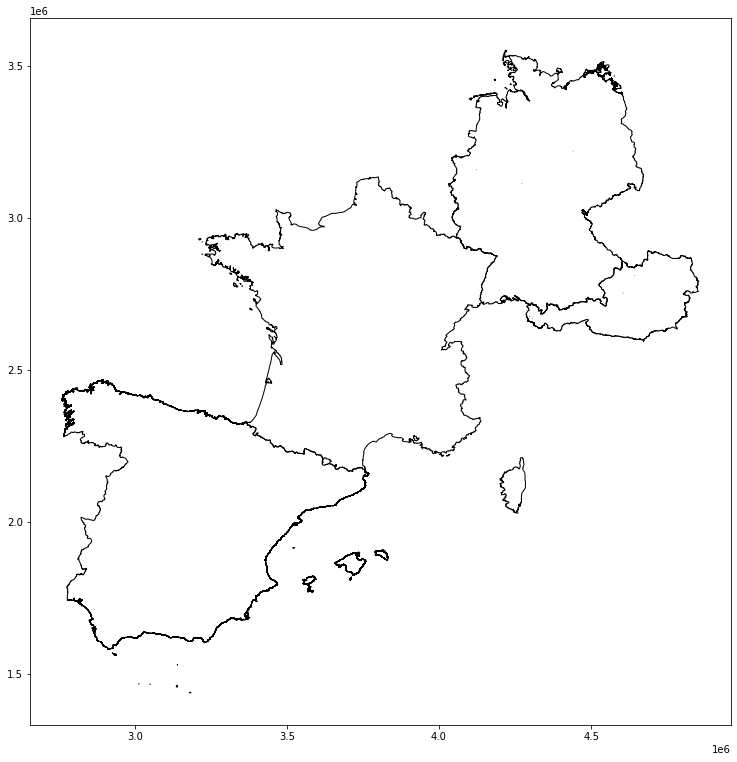

In [7]:
fig, ax = plt.subplots(figsize=(13,13))
bound_all.plot(ax=ax,facecolor='None',edgecolor='black')

In [8]:
cities=['Berlin','Dresden','Düsseldorf','Frankfurt am Main','Kassel','Leipzig','Magdeburg','Potsdam','Clermont','Dijon','Lille','Lyon','Montpellier','Nantes','Nimes','Paris','Toulouse','Madrid','Wien']
crs0=3035
for city in cities:
    fp='../outputs/city_boundaries/'+city+'.csv'
    gdf_all0=import_csv_w_wkt_to_gdf(fp,crs0)
    gdf_all0['city']=city

    if 'gdf_all' in locals():
        gdf_all=pd.concat([gdf_all,gdf_all0])
    else:
        gdf_all=gdf_all0
gdf_all.reset_index(inplace=True,drop=True)

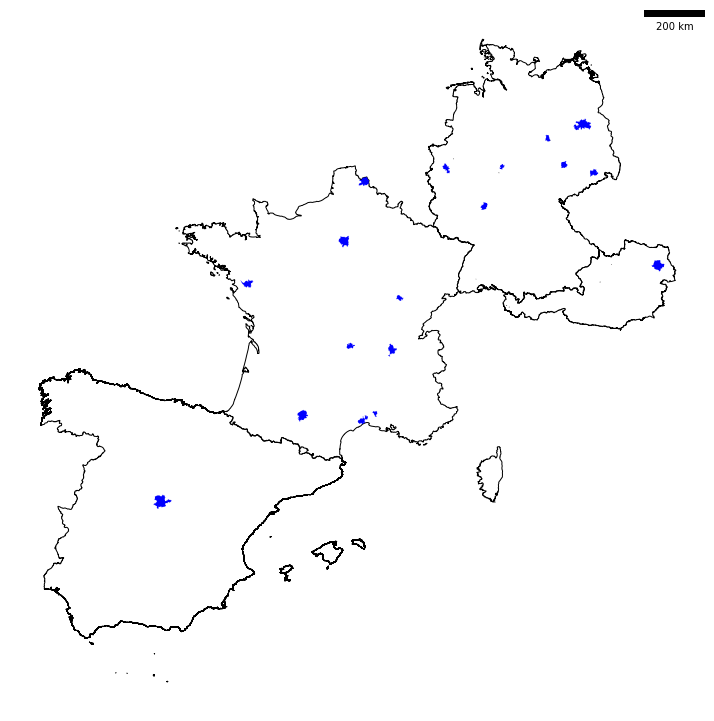

In [9]:
# plot all the city boundaries and the french/german boundaries
fig, ax = plt.subplots(figsize=(13,13))
bound_all.plot(ax=ax,facecolor='None',edgecolor='black')
gdf_all.plot(ax=ax,color='b')
ax.add_artist(ScaleBar(1))
ax.axis('off')
plt.savefig('../figures/summary_all/boundary_cities.png',facecolor='w',dpi=200,bbox_inches='tight')